## 0. Notes based on common homework issues
* When turning in Jupyter notebooks by committing them to a git repository, please make sure you have run every cell in your notebook and then saved the state of the notebook. This will allow us to view your notebook output through GitHub and it will ensure that all of your cells are working as expected prior to final submission.

## 0.a. Git repository clean-up

* Make sure both your Lab 1 Jupyter notebook and python script are commited and pushed to the branch you made the first week.
* Make sure your homework from last week is committed and pushed to GitHub.

## 0.b. We will now each create a private repository through GitHub

* Go to your GitHub profile page.
* Click on Repositories
* Click on "New"
* Give our new repository the name E11Homework (or something similar)
* IMPORTANT: Check "Private"
* Check "Initialize this repository with a README
* Click "Create repository"
* Go to "Settings"
* Click on "Collaborators" on the left side-bar (you will be prompted for your GitHub password
* Add me (alihanks) and Chris (cllamb0) as collaborators so that we can view  your future homework submissions.


## 0.c. Now clone this new repository locally
* Click on "Clone or Download" and copy the HTTPS url for your new repository 
* At your GitBash or Terminal commmand line: 
```
$ cd ~
$ git clone <url-to-your-repository>
``` 
(paste the url after git clone)
* Open Jupyter notebook and navigate to your new repository folder (directory)
  * This should be a folder in your home directory - where you start when you start Jupyter
* Create a new notebook and name it "Lab3-Activity"

# Homework Extra Credit:
1. Correct your lab 1 activity notebook based on the solutions posted here: https://github.com/engineering-11/Activities/blob/master/Results/Lab%201%20Activity-Solutions.ipynb
2. Move your corrected notebook, the python script you created last week, and the homework you submitted today to your private repository and add/commit everything to that repository.

# We are ready to start the lab!

## 1. Getting your data

We have a Raspberry pi computer running as a webserver that is hosting the data we will be using today. The first step is to download that data.

* Over WiFi connect to `RPiTouchServer`. The WPA2 password will be provided in lab.
* Make a folder for keeping data - at the command-line prompt:
```
$ cd ~
$ mkdir E11data
```

* Copy the data from the RPi server to this folder - at your command-line prompt:
```
$ scp pi@192.168.4.1:~/data/Inside* ~/E11data
```

* This step will prompt you for a password for the `pi` user on that server, this will be provided in lab.

## 2. Prepare your Jupyter Notebook

Import the python libraries we will need for this activity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## 3. Read in your data csv (comma-separated-variable) file using pandas

In [3]:
data = pd.read_csv("~/E11data/Inside_p1_g3_2019-09-17_10s_D3S.csv")

Take a look at the output. Each line in this file is a list of 4096 values. Each row gives the number of counts (interaction in the detector) measured at the energy corresponding to that column value (0-4096).

In [ ]:
data

In [4]:
# Put this pandas DataFrame into a numpy array so that we can perform fast manipulations of the data
spectra = np.array(data)

### 3.a. Let's take a look at the integrated spectrum
By this I mean we will sum over all rows in our array to see the total counts across the full energy range recorded.

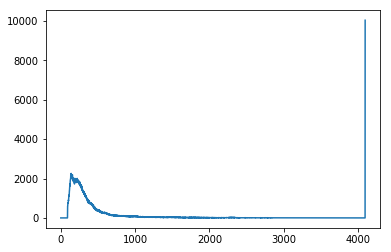

In [5]:
spectrum = spectra.sum(axis=0)
plt.plot(spectrum)
plt.show()

### 3.b. Let's try that as a log plot

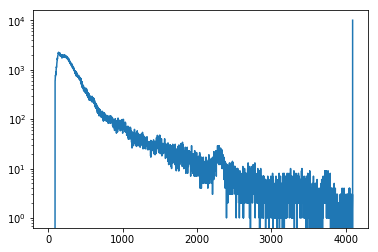

In [6]:
plt.plot(spectrum)
plt.yscale("log")
plt.show()

### 3.c. Try zooming in on the counts between columns 1000 and 2000 (x-axis range)

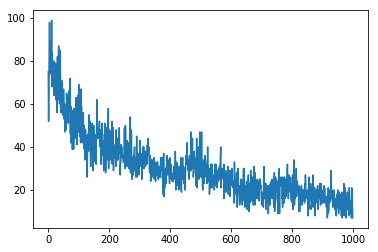

In [7]:
plt.plot(spectrum[1000:2000])
#plt.yscale("log")
plt.show()

### Why are these points fluctuating so much and is this what we expect?

* We can think of each column as a bin in a histogram
* To improve these fluctuations we need more counts in each bin
* We could do this by taking more data but we can also do it now by combining counts in adjacent bins - rebinning

In [8]:
print(spectrum.shape)
spectrum_resize = np.resize(spectrum,(1028,4))
print(spectrum_resize.shape)

(4096,)
(1028, 4)


In [9]:
# We've split our 4096 bins into 4 sets of 1028 bins, we now just need to sum those together
spectrum_rebin = spectrum_resize.sum(axis=1)
print(spectrum_rebin.shape)

(1028,)


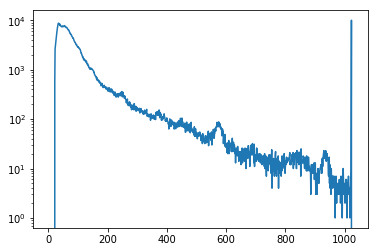

In [10]:
plt.plot(spectrum_rebin)
plt.yscale("log")
plt.show()

### If we now want to zoom in on the same section we looked at in the initial spectrum, what index range do we want to look at?

We've rebinned by 4, so the array elements that were previously ranging from 1000 - 2000 are now ranging from 250 - 500

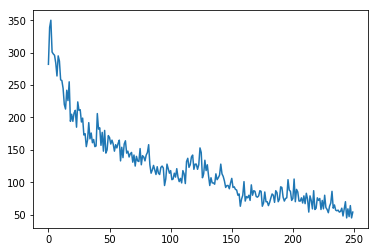

In [11]:
plt.plot(spectrum_rebin[250:500])
#plt.yscale("log")
plt.show()

## 4. Now we will look at total counts

* This involves summing the original 2D array across the other axis 
* So instead of summing all rows, we will sum across all columns for each row and get total counts within the time interval data was collected for
  * that is the data that goes in to each row

In [12]:
counts = spectra.sum(axis=1)
counts

array([105,  94, 119, ...,  93,  90, 102])

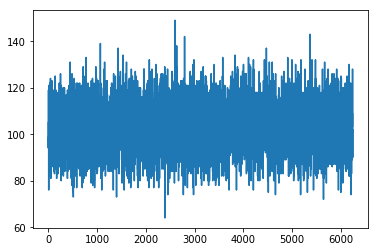

In [13]:
plt.plot(counts)
plt.show()

### Each entry in `counts` contains the total number of counts, `N`, collected over a 2s interval, what is the uncertainty on that number?

Let's zoom in again

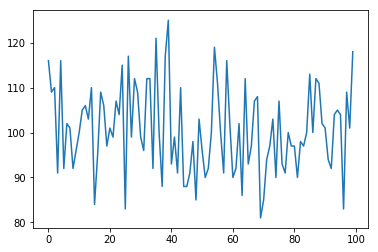

In [14]:
plt.plot(counts[100:200])
plt.show()

Do these fluctuations make sense? Based on our answer above about the uncertainty on the number of counts, we can plot this distribution with error bars.

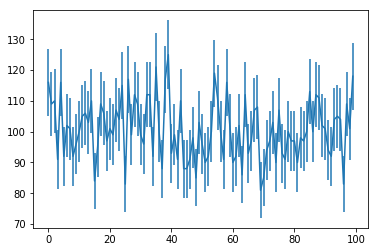

In [15]:
x = range(len(counts[100:200]))
plt.errorbar(x,counts[100:200],np.sqrt(counts[100:200]))
plt.show()

### How would we decrease these error bars without adding new data?

Just like we did for the spectrum, we can combine adjacent values, or "bins", to rebin this distribution - putting more counts in each entry.

(6247,)
(1561, 4)
(1561,)


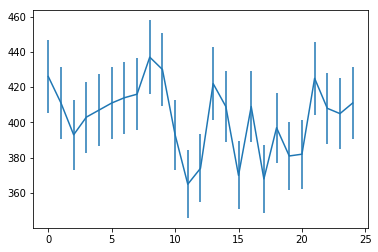

In [16]:
print(counts.shape)
counts_resize = np.resize(counts,(int(counts.shape[0]/4),4))
print(counts_resize.shape)
counts_rebin = counts_resize.sum(axis=1)
print(counts_rebin.shape)
x = range(len(counts_rebin[25:50]))
plt.errorbar(x,counts_rebin[25:50],np.sqrt(counts_rebin[25:50]))
plt.show()

In this data, each entry in our array of counts is from a 2 second data collection interval. So we are looking at is the total counts per 2s interval. If we rebin this by a factor of 4, like we did with the spectrum, what does each entry in our new array of counts represent?

We took our 2s intervals and combined them in 4 interval chunks, so now each entry corresponds to 2x4 = 8 seconds of data collection.

### 4.a. Make a histogram of this data

To start with, determine the total range of values in counts. Use that range to set the number of bins so that the bin-width (range of each bin) is 1 count. So a bin would go from 5-6, or 6-7, etc.

In [19]:
xmin = np.min(counts)
xmax = np.max(counts)
print(xmin)
print(xmax)
nbins = xmax-xmin+1

64
149


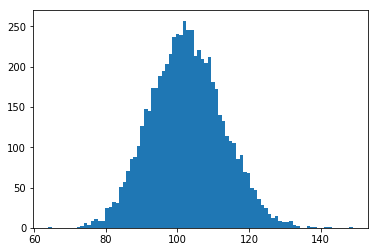

In [20]:
plt.hist(counts,bins=nbins)
plt.show()

### 4.b. Determine the mean and standard deviation and plot the corresponding Gaussian (Normal) distribution

For this, recall that the functional form for the Gaussian distribution is:

$ \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Where $\mu = \overline x$ - the mean of the distribution, and $\sigma$ is the standard deviation.

We can rely on a python package that has predefined the normal distribution, but we will also go through making our own, which has the advantage of being able to control the normalization.

In [21]:
def gaussian(x, mu, sigma):
    func = 1/(sigma*math.sqrt(2*math.pi))*np.exp(-np.power((x-mu),2)/(2*math.pow(sigma,2)))
    return func

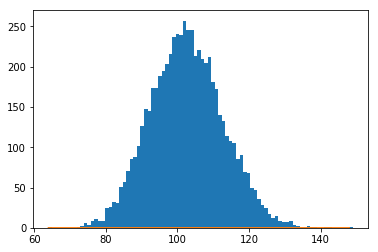

In [23]:
mu = np.mean(counts)
sigma = np.std(counts)

plt.hist(counts,bins=nbins)
x = np.arange(xmin, xmax, 1)
plt.plot(x, gaussian(x, mu, sigma))
plt.show()

### Why can't we see the Gaussian distribution. Try graphing it by itself

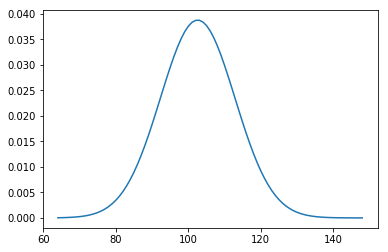

In [24]:
x = np.arange(xmin, xmax, 1)
plt.plot(x, gaussian(x, mu, sigma))
plt.show()

Let's also try the pre-defined method to see how that works

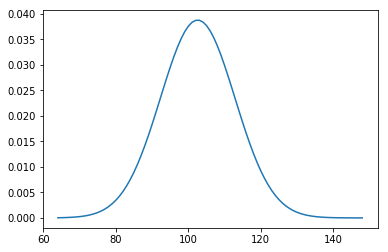

In [25]:
# We need to import the library where this predefined function is created
from scipy.stats import norm

x = np.arange(xmin, xmax, 1)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

This Gaussian distribution is a probability distribution, that means it's normalized to so that $\Sigma(P(x)) = 1$.

We need to normalize our histogram as well! How do we do that?

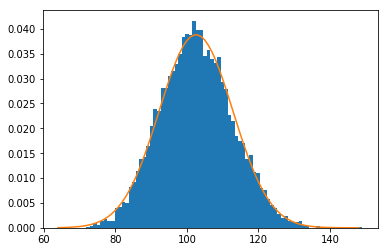

In [26]:
plt.hist(counts,bins=nbins,density=True)
x = np.arange(xmin, xmax, 1)
plt.plot(x, gaussian(x, mu, sigma))
plt.show()

### So is a Normal distribution the right distribution to describe this data?

What is the average number of counts?

In [27]:
print(np.mean(counts))

102.57419561389467


At what mean value of our measured quantity did we say that the Gaussian distribution became applicable?

Let's try Poisson and see if it does better? Recall that the functional form for the Poisson distribution is:

$ \frac{\mu^{x}e^{-\mu}}{x!}$

again $\mu = \overline x$ - the mean value of the distribution.

In [28]:
# For the predefined Poisson distribution function we need to import the relevant library
from scipy.stats import poisson

# Because we imported a library called poisson, we need to call our function something else
# We do need a way to take factorials of arrays, though, and we find that here
from scipy.special import factorial

# Now we're ready to make our function
def my_poisson(x, mu):
    func = np.power(mu,x)*np.exp(-1*mu)/factorial(x)
    return func

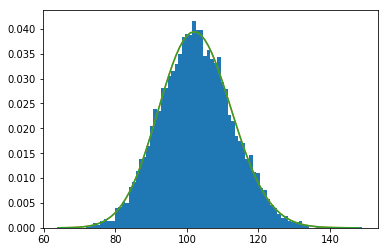

In [30]:
plt.hist(counts,bins=nbins,density=True)
x = np.arange(xmin, xmax, 1)
plt.plot(x, poisson.pmf(x, mu)) # This is the predefined way to get a Poisson distribution
plt.plot(x, my_poisson(x, mu))
plt.show()

### NOTE: next week we'll discuss how we might compare which of these distributions is doing a better job describing the data more quantitatively

## 5. Now back to that spectrum to study average "energy"

Let's remind ourselves what the total energy spectrum looks like first. Plot it again.

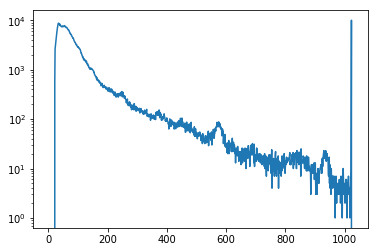

In [31]:
plt.plot(spectrum_rebin)
plt.yscale("log")
plt.show()

### 5.a. What's the average energy measured across this entire data set?

Recall from class that we can calculate an average value for some measurement, x, as $\overline x = \left<x\right> = \Sigma xF(x)$

This holds for determining the expectation value for any variable x described by the frequency distribution F(x), provided we've defined F(x) such that $\Sigma F(x) = 1$.

Our energy spectrum above provides the frequency with which counts at a particular energy occurr, we just need to normalize this distribution to sum to one.

In [32]:
spectrum_integral = spectrum_rebin.sum()
spectrum_norm = spectrum_rebin/spectrum_integral

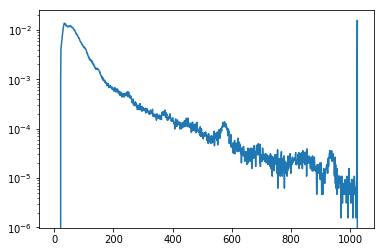

In [33]:
plt.plot(spectrum_norm)
plt.yscale("log")
plt.show()

In [34]:
# We can do this using a for loop to iterate over each index (x value) in our spectrum array
mean_x = 0
for x,F in enumerate(spectrum_norm):
    mean_x += x*F

print("The mean value along the x-axis (energy) = {}".format(mean_x))

The mean value along the x-axis (energy) = 114.33619910702723


### 5.b. What would happen if we remove the excess counts at high energy?

These are an artifact of the detector, and not really part of the real radiation distribution.

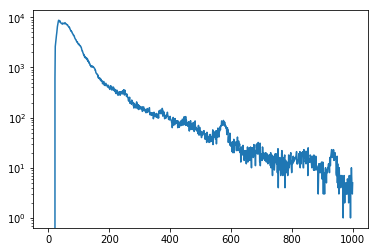

In [35]:
sub_spectrum = spectrum_rebin[:1000]
plt.plot(sub_spectrum)
plt.yscale("log")
plt.show()

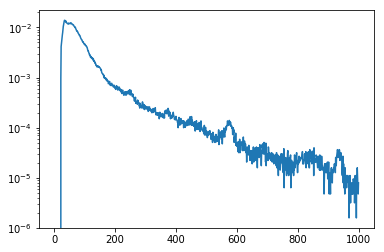

In [36]:
spectrum_integral = sub_spectrum.sum()
spectrum_norm = sub_spectrum/spectrum_integral
plt.plot(spectrum_norm)
plt.yscale("log")
plt.show()

In [37]:
# Note, we used a for loop above, but we can do this a little more "Pythonically"
mean_x = sum([x*F for x,F in enumerate(spectrum_norm)])
print(mean_x)

99.73639769950547


### 5.c. Now we will look at "samples" within this data set to explore variations in the measured energy

To do this, we will split up our spectra into equal chunks by slicing the original 2D array

In [38]:
spectra_sample = spectra[0:100]
spectrum_sample = spectra_sample.sum(axis=0)
# We want to cut out the high energy junk but we haven't rebinned this version, so we need to gut at 4000 not 1000
spectrum_sample = spectrum_sample[:4000]

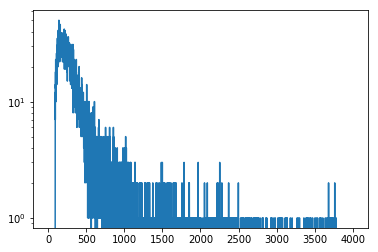

In [39]:
plt.plot(spectrum_sample)
plt.yscale("log")
plt.show()

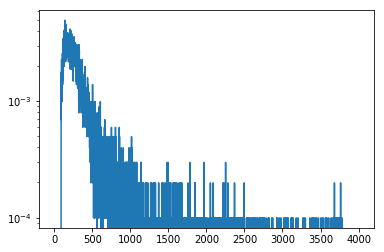

In [40]:
spectrum_integral = spectrum_sample.sum()
norm_sample = spectrum_sample/spectrum_integral
plt.plot(norm_sample)
plt.yscale("log")
plt.show()

In [41]:
sample_mean_x = 0
for x,F in enumerate(norm_sample):
    sample_mean_x += x*F
print(sample_mean_x)

408.9010716411992


### This is suprising? But wait! In this distribution `x` goes from 0 - 4000, not 0 - 1000. We rebinned before.

These x values are effectively 4 times the previous case. So we can simply divide this answer by the ribinning factor, 4.

In [42]:
sample_mean_x = 0
for x,F in enumerate(norm_sample):
    sample_mean_x += x*F
sample_mean_x = sample_mean_x/4
print(sample_mean_x)

102.2252679102998


# Homework Part 1:

## 6. We can now do this same thing for all of our samples of the spectra

### 6.a. Following the same steps as we took in 5.c. (not including plotting), build up a list of the sample mean "Energy" - $\left<x\right>$ - for N slices, where each slice grabs 100 entries (spectra).

* **First:** How many spectra did we take? We can find this out by looking at the length of the `counts` array from earlier, because each entry in that array is the sum of all the counts collected in that spectrum.

In [43]:
len(counts)

6247

There are almost 12000 spectra! 

If we devide these up into chunks of 100, we will have to repeat the work done in 5.c 117 times. We should not do this manually! That would mean writing out code like this:
```
spectra_sample1 = spectra[0:100]
...


```

```
spectra_sample2 = spectra[100:200]
...


```

```
spectra_sample3 = spectra[200:300]
...


```

And doing that 117 times!

Instead, we can define a function that executes all of the steps needed and returns the resulting $\left<x\right>$ for the specified chunk: `spectra[start:stop]`.

We can then create a loop that iterates over the desired `start` and `stop` until we have a list of 117 $\left<x\right>$ values, one for each chunk of spectra.

In [47]:
# I will define a function that can do all of the work for each 100 measurement slice
def get_mean_x(spectra, slice_start, slice_stop):
    """
    takes a slice of a 2D array of spectra and returns the expectation value (mean) value
        along the x (Energy) axis
    
    Args:
        input 2D array of spectra to slice
        start and stop index range to slice over
    Returns:
        mean value along the x-axis (energy) of the 
            spectrum integrated over the stop-stop slices
    """
    # Get the 2D slice from the input spectrum
    spectra_sample = spectra[slice_start:slice_stop]
    # sum along the axis we sliced
    spectrum_sample = spectra_sample.sum(axis=0)
    # cut off the high end of the resulting integrated spectrum to remove the overflow bin
    spectrum_sample = spectrum_sample[:4000]
    # Normalize the spectrum (so that it integrates to 1) 
    #   to make it a relative frequency distribution
    norm_sample = spectrum_sample/spectrum_sample.sum()
    # Calculate the expectation value for x using this frequency distribution
    sample_mean_x = sum([x*F/4 for x,F in enumerate(norm_sample)])
    return sample_mean_x

In [48]:
nloops = int(len(counts)/100)
mean_x_list = []
for i in range(nloops):
    mean_x_i = get_mean_x(spectra, i*100, (i+1)*100)
    mean_x_list.append(mean_x_i)
print(mean_x_list)

[102.2252679102998, 99.97018765133184, 99.91649027315799, 100.304997992774, 100.50143777887963, 99.93654266958423, 99.90111132966156, 99.24693652069104, 99.69427275446115, 101.3479010494752, 101.15843109962202, 100.52580951429147, 100.245888319874, 101.45140767458179, 98.86104518936034, 99.69237745098047, 99.49666238132903, 99.55010315355133, 99.8437468709322, 99.28229581673305, 99.40304126735751, 101.56270096463042, 99.63291983789658, 102.76212224273633, 101.08011583011577, 98.65468952456919, 98.67241800078101, 101.05823779403048, 102.0031023528245, 102.12461713269435, 99.28065944881882, 100.05902950233423, 100.87794596193685, 100.05346400641639, 100.01500197394392, 99.39723174914226, 99.11135360224752, 102.49995119570313, 100.3765243902438, 97.83746904408156, 101.24861972103838, 100.9181518314297, 101.13204312829166, 100.2772577914964, 101.34779773978568, 99.80379966313296, 97.62014778325123, 99.42743877960659, 98.96309430639795, 100.34432243450848, 99.42850064413831, 99.595869017632

### 6.b. Plot your list of mean x values (the mean energy of each sample spectrum) in a histogram

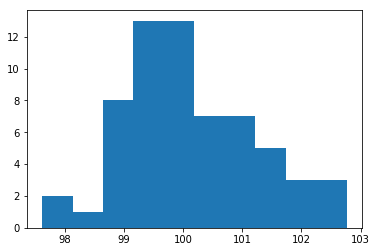

In [56]:
nbins_x = int(np.max(mean_x_list) - np.min(mean_x_list))*2
plt.hist(mean_x_list, bins=nbins_x)
plt.show()

### 6.c. What are the mean and standard deviation of this distribution?

In [58]:
meanx = np.mean(mean_x_list)
stdx = np.std(mean_x_list)
print("The <x> = {} +/- {}".format(meanx,stdx))

The <x> = 100.11780397395322 +/- 1.115042673513038


### 6.d. Add the Gaussian (Normal) distribution curve defined by this mean and sigma to your plot of the histogrammed average energies

Don't forget to plot your histogram as a normalized distribution!

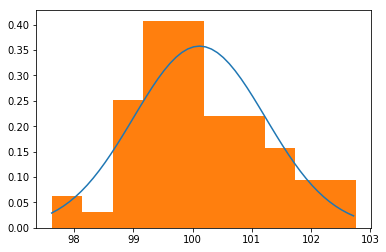

In [60]:
x = np.arange(np.min(mean_x_list), np.max(mean_x_list), 0.1)
plt.plot(x, gaussian(x, meanx, stdx))
plt.hist(mean_x_list, bins=nbins_x, density=True)
plt.show()

# Homework Part 2: Looking at a second set of data

Our other data file is: ~/E11data/Inside_p1_g3_2019-09-17_10s_D3S.csv

**NOTE:** There should be two files with very similar names. You should have read in one of these files during the lab, and you will now follow the same procedure for the second file. The names may be swapped in your case based on which file we used during the lab. 

The file with `10s` in the name indicates that data was collected in 10 second intervals, the file with `2s` in the name indicates that the data was collected in 2 second intervals. You should keep track of which is which because it will be relevant for later parts of the homework.

## 1. Read in this data in the same way that we read the first data set

In [63]:
data2 = pd.read_csv("~/E11data/Inside_p1_g3_2019-09-17_2s_D3S.csv")

## 2. Create your integrated spectrum and counts arrays as we did for the first data set

In [64]:
spectra2 = np.array(data2)
spectrum2 = spectra2.sum(axis=0)
counts2 = spectra2.sum(axis=1)

## 3. Plot the spectrum
### 3.a. Cut out the high energy spike at the end of the distribution

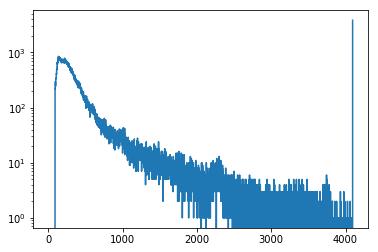

In [65]:
plt.plot(spectrum2)
plt.yscale("log")
plt.show()

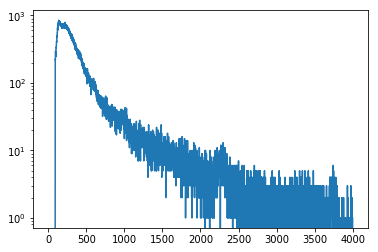

In [66]:
plt.plot(spectrum2[0:4000])
plt.yscale("log")
plt.show()

## 4. Plot the counts
### 4.a. Plot the counts across the full time-series

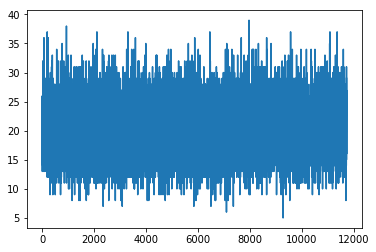

In [69]:
plt.plot(counts2)
plt.show()

### 4.b. Plot the counts as a histogram - as we did for the first data set
**NOTE:** Be sure to set the number of bins in the same way we did before, do not use the same number of bins as you did for the first data set.

5
39


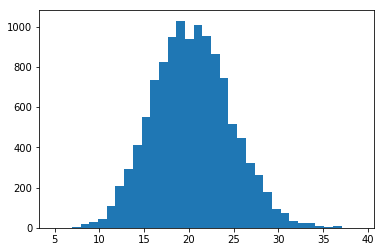

In [68]:
xmin2 = np.min(counts2)
xmax2 = np.max(counts2)
print(xmin2)
print(xmax2)
nbins2 = xmax2-xmin2+1
plt.hist(counts2,bins=nbins2)
plt.show()

## 5. Comparing data
### 5.a. Plot this counts histogram together with the original data set (with labels!)

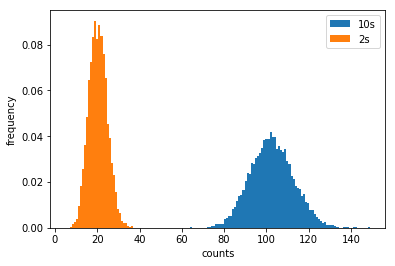

In [70]:
plt.hist(counts,bins=nbins,density=True,label='10s')
plt.hist(counts2,bins=nbins2,density=True,label='2s')
plt.xlabel("counts")
plt.ylabel("frequency")
plt.legend()
plt.show()

####   5.a.i. what differences do you see?

**Answer**

The 10s interval data has a higher average number of counts, and the distributions is wider - meaning the frequency of measurements of counts for a given value around that mean will be lower.

####   5.a.ii. Calculate the mean and standard deviation for each set of counts, how do they compare?

In [77]:
print("For the 10s interval data <N> +/- sigma = {} +/- {}".format(np.mean(counts),
                                                                   np.std(counts)))

print("For the 2s interval data <N> +/- sigma = {} +/- {}".format(np.mean(counts2),
                                                                   np.std(counts2)))


For the 10s interval data <N> +/- sigma = 102.57419561389467 +/- 10.279364621173858
For the 2s interval data <N> +/- sigma = 20.29889865960898 +/- 4.511239422034201


The mean number of counts is very different. The standard deviation for the 10s interval data is larger, both are close to the expected uncertainty of $\sqrt(N)$.

### 5.b. This data was taken over 10s intervals so each entry in the counts array is the total counts over 10s. Convert both sets of counts to counts-per-second

In [74]:
cps10 = counts/10
cps2 = counts2/2

### 5.c. Plot these new counts-per-second arrays from both data sets together, as histograms, with labels!
**HINT:** Don't forget to plot these as normalized frequency distributions - that is, use the `density=True` argument when plotting the histograms.

**NOTE:** Keep the binning the same as for previous plots. So each data set should have it's own binning determined from the original counts arrays.

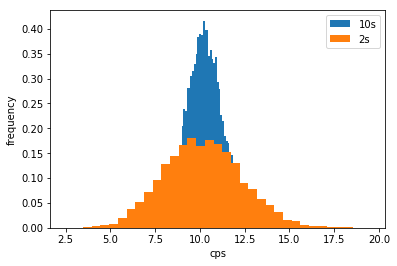

In [75]:
plt.hist(cps10,bins=nbins,density=True,label='10s')
plt.hist(cps2,bins=nbins2,density=True,label='2s')
plt.xlabel("cps")
plt.ylabel("frequency")
plt.legend()
plt.show()

#### 5.c.i. What differences do you see now? Has your answer changed from 5.a.i?

**Answer**

The distributions now appear to have the same central value. Now the 2s interval data is the wider of the two distributions, with the lower frequency of measurements per bin, the opposite of what we were seeing in 5.a.i.

#### 5.c.ii. Calculate the mean and standard deviation from these counts-per-second distributions - how do they compare?

In [79]:
print("We can calculate this directly from our scaled arrays of cps data")
print("For the 10s interval data <cps> +/- std = {} +/- {}".format(np.mean(cps10),
                                                                   np.std(cps10)))

print("For the 2s interval data <cps> +/- std = {} +/- {}".format(np.mean(cps2),
                                                                   np.std(cps2)))

print("Or we can calculate this from the total number of counts using counting statistics.")
cps_10_mean = np.mean(counts)/10
cps_10_sigma = np.sqrt(np.mean(counts))/10
print("For the 10s interval data <N>/10 +/- sqrt(<N>)/10 = {} +/- {}".format(cps_10_mean,
                                                                             cps_10_sigma))
cps_2_mean = np.mean(counts2)/2
cps_2_sigma = np.sqrt(np.mean(counts2))/2
print("For the 2s interval data <N>/2 +/- sqrt(<N>)/2 = {} +/- {}".format(cps_2_mean,
                                                                          cps_2_sigma))


We can calculate this directly from our scaled arrays of cps data
For the 10s interval data <cps> +/- std = 10.257419561389469 +/- 1.0279364621173859
For the 2s interval data <cps> +/- std = 10.14944932980449 +/- 2.2556197110171006
Or we can calculate this from the total number of counts using counting statistics.
For the 10s interval data <N>/10 +/- sqrt(<N>)/10 = 10.257419561389467 +/- 1.0127891962984927
For the 2s interval data <N>/2 +/- sqrt(<N>)/2 = 10.14944932980449 +/- 2.2527149542057567


We now see that the mean counts-per-second for both sets of data are consistent. The standard deviation for the 10s interval data is now smaller than for the 2s interval data.

#### 5.c.iii. Is your answer here different than for 5.a.ii? Why or why not? Is this what you expected?

**Answer**

Yes, in 5.a.ii. we saw that the standard deviaton was larger for the 10s interval data. That's because it was the absolute uncertainty and the average number of counts collected over 10s intervals is larger, so $\sqrt(N)$ is also larger. However, now we are scaling this to see what the count-rate looks like. In this case, taking data for longer intervals, collecting more counts, improves - lowers - our uncertainties. 

This is what you should expect. Taking more data will *always* improve your knowledge of the underlying property being measured. We can think about this more generally in terms of percent uncertainties. For the 10s interval data, the *relative* uncertainty is $\sqrt(100)/100 = .1 = 10\%$, while for the 2s intervale data it is $\sqrt(20)/20 = .22 = 22\%$.

## 6. How long was data collected for each data set?

**HINT:** I've told you the time interval for each entry in the array of counts

In [81]:
print("10s interval data was collected for a total of {} s".format(len(counts)*10))
print("2s interval data was collected for a total of {} s".format(len(counts2)*2))

10s interval data was collected for a total of 62470 s
2s interval data was collected for a total of 23426 s


### 6. a. The integrated spectrum from each data set shows the counts in each "energy" bin integrated over the full data collection time. Based on your answer above, which spectrum (the spectrum from the first data set or the second) do you expect to have smaller uncertainties at each energy?

**HINT:** I'm asking you to compare total counts, and the corresponding uncertainty in those counts, in the same energy bin (x-axis entry in the spectrum distribution).

**Answer**

The 10s interval data will include a larger number of total counts in each energy bin. So the $\sqrt(N)$ uncertainty will be larger.

That said, the relative uncertainty - and therfore the fluctuations from bin-to-bin - will be smaller because the total amount of data is larger.

**Extra**
We can see this if we plot the two integrated spectra side-by-side. Note that the variation from point-to-point is less for the 10s data and more of the features in the spectrum are visible.

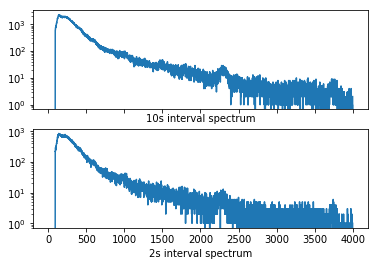

In [86]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(spectrum[0:4000])
ax1.set_yscale("log")
ax1.set_xlabel("10s interval spectrum")
ax2.plot(spectrum2[0:4000])
ax2.set_yscale("log")
ax2.set_xlabel("2s interval spectrum")
plt.show()